In [1]:
import numpy as np
from model import LotkaVolterraModel
from summstats import LotkaVolterraStats

import matplotlib.pyplot as plt

import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer

from parameters import ParameterSet

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
params = ParameterSet({})

params.seed = 42

params.dt = 0.2
params.T = 30

params.logparam_limits = (-5,2)

params.init = [50, 100]
params.true_params = [0.01, 0.5, 1, 0.01]

In [3]:
m = LotkaVolterraModel(dt=params.dt, T=params.T, seed=params.seed)
p = dd.LogUniform(*np.exp(params.logparam_limits))
s = LotkaVolterraStats()

In [9]:
def plot_sample(m, theta, s=None):
    fig = plt.figure()
    
    xlist = np.arange(0, m.T + m.dt, m.dt)
    
    sample = m.gen_single(theta)
    states = sample['data'].T
    
    for var in states:
        plt.plot(xlist, var)
        
    plt.show()
    
    if s is not None:
        ...#print(s.calc(states.flatten()))
    

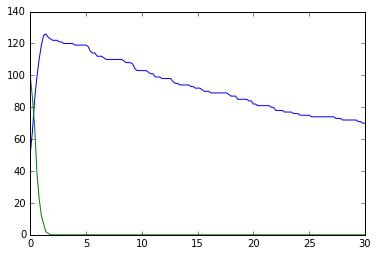

In [10]:
for i in range(1):
    theta = p.gen(n_samples=1)
    plot_sample(m, theta, s)

In [11]:
g = dg.Default(model=m, prior=p, summary=s)

In [ ]:
res = infer.SNPE(g=g, xobs=params.obs_stats, )